In [3]:
file = open('/content/adult.data', 'r')

In [4]:
def chr_int(a):
    if a.isdigit():
        return int(a)
    else:
        return 0


data=[]
for line in file:
     data1=line.split(', ')
     if len(data1)==15:
        data.append([chr_int(data1[0]),data1[1],chr_int(data1[2]),data1[3],chr_int(data1[4]),data1[5],data1[6],\
            data1[7],data1[8],data1[9],chr_int(data1[10]),chr_int(data1[11]),chr_int(data1[12]),data1[13],\
            data1[14]])

In [5]:
%matplotlib inline
import pandas as pd

df = pd.DataFrame(data) #  Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes

df.columns = ['age', 'type_employer', 'fnlwgt', 'education',
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country","income"]
df.head()




,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


In [31]:
ml1 = df[(df.sex == 'Male')&(df.income=='>50K\n')]
ml1.shape
ml1.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K\n
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K\n
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K\n
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K\n
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K\n


In [32]:
ml1["age"]

7        52
9        42
10       37
11       30
14       40
         ..
32532    34
32533    54
32539    71
32554    53
32557    40
Name: age, Length: 6662, dtype: int64

In [37]:
import numpy as np

age_sorted=ml1['age'].sort_values()
print(age_sorted.min())

quartiles=np.quantile(age_sorted,[0.25,0.75])
print(quartiles)
IQR= quartiles[1]-quartiles[0]
print("IQR = " + str(IQR))
LowerInnerFence=quartiles[0]-(1.5*IQR)
print(LowerInnerFence)
UpperInnerFence=quartiles[1]+(1.5*IQR)
print(UpperInnerFence)

19
[37. 51.]
IQR = 14.0
16.0
72.0


{'whiskers': [<matplotlib.lines.Line2D at 0x796b0c74c520>,
 'caps': [<matplotlib.lines.Line2D at 0x796b0c74d4e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x796b0c74c640>],
 'medians': [<matplotlib.lines.Line2D at 0x796b0c74f1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x796b0c74fc40>],
 'means': []}

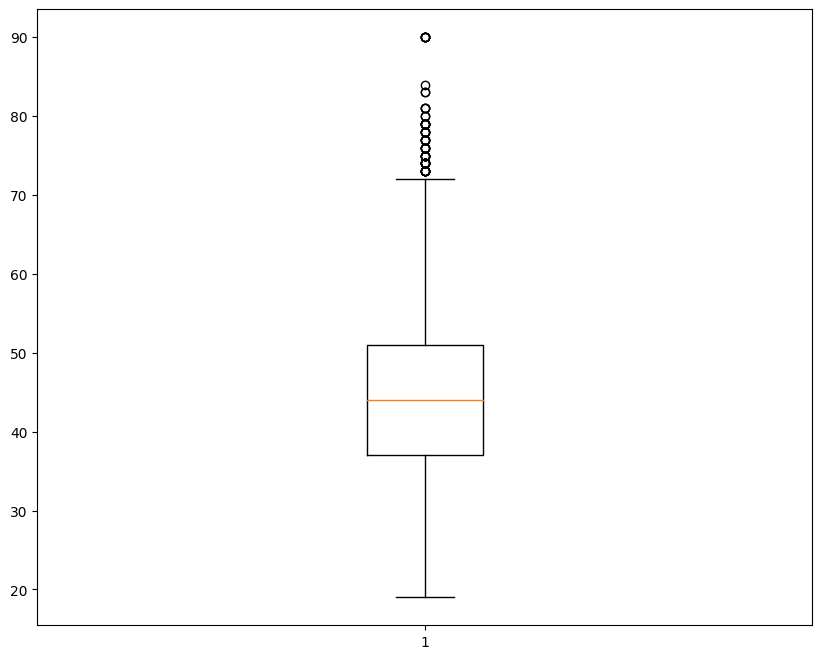

In [38]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize =(10, 8))
plt.boxplot(age_sorted)



In [39]:
age_sorted.describe()

count    6662.000000
mean       44.625788
std        10.485469
min        19.000000
25%        37.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64

In [40]:
type(age_sorted)

pandas.core.series.Series

In [26]:
import numpy as np
test_array = np.arange(2, 3, 0.1)
for index, value in np.ndenumerate(test_array):
    print(test_array[index])

2.0
2.1
2.2
2.3000000000000003
2.4000000000000004
2.5000000000000004
2.6000000000000005
2.7000000000000006
2.8000000000000007
2.900000000000001


In [42]:
age_sorted.describe()

count    6662.000000
mean       44.625788
std        10.485469
min        19.000000
25%        37.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64

In [49]:
age_sorted.iloc[6661]

90

In [51]:
for i in range(len(age_sorted)):
  if age_sorted.iloc[i]>UpperInnerFence:
    age_sorted.iloc[i]=UpperInnerFence


In [52]:
age_sorted.describe()

count    6662.000000
mean       44.655659
std        10.349138
min        19.000000
25%        37.000000
50%        44.000000
75%        51.000000
max        72.000000
Name: age, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x796b0c3e6800>,
 'caps': [<matplotlib.lines.Line2D at 0x796b0c3e4a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x796b0c3e6350>],
 'medians': [<matplotlib.lines.Line2D at 0x796b0c3e5420>],
 'fliers': [<matplotlib.lines.Line2D at 0x796b0c3e6dd0>],
 'means': []}

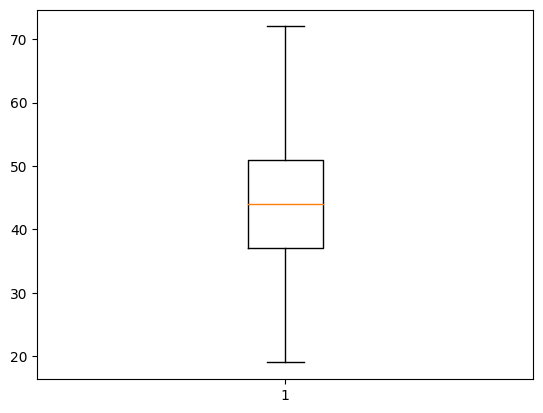

In [53]:
plt.boxplot(age_sorted)
